In [8]:
import numpy as np
import random
import os
import sys
import pandas as pd
from pandas import read_table, read_csv
import matplotlib.pyplot as plt
import seaborn as sb
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

First let's load the data to a varible named "data_set" in a way it understand that values represented as '?' are meant to be understood as NaN (meaning it's missing data).

In [9]:
# read the csv table using Pandas
# identify missing values as ?
data_set = pd.read_csv('hcc_dataset.csv', na_values=['?'], sep=",")
data_set_disposable = data_set.copy()
# read_csv understand "None" value as being "NaN" so we have to replace every "NaN" value in Ascites and Encephalopathy to "None"
data_set.loc[data_set_disposable["Ascites"].isnull(),"Ascites"] = "None" 
data_set.loc[data_set_disposable["Encephalopathy"].isnull(),"Encephalopathy"] = "None" 
data_set_disposable.loc[data_set_disposable["Ascites"].isnull(),"Ascites"] = "None"
data_set_disposable.loc[data_set_disposable["Encephalopathy"].isnull(),"Encephalopathy"] = "None"


Unfortunately, the column " Albunim" has a white space at the beginning, so to avoid dealing with this problem later one, we'll strip every column so as not to leave any white spaces if we decide to investigate each one individually.
We'll also do it to each existing value.

In [10]:
list0 = []
for i in range(len(data_set.columns)):
    list0.append(data_set.columns[i].strip())
    if data_set[data_set.columns[i]].dtype == object: data_set[data_set.columns[i]].str.strip()
data_set.columns = list0

To get an idea of what we're analizing let's show the table loaded to data_set.

In [11]:
pd.set_option('display.max_rows', 10)  # Set to display 170 rows
pd.set_option('display.max_columns', 50)  # Set to display 50 columns
#pd.reset_option('display.max_rows')  # Set to display default columns
#pd.reset_option('display.max_columns')  # Set to display default columns

# show the table
data_set

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,NaN,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137.0,15.0,Active,None,None,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0.0,NaN,Active,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50.0,50.0,Ambulatory,None,Mild,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40.0,30.0,Active,None,None,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100.0,30.0,Active,None,None,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,40,NaN,NaN,Active,None,None,0.84,NaN,15.4,109.2,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,Lives
161,Female,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,No,No,No,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes,68,0.0,0.0,Ambulatory,None,None,1.33,4887.0,12.1,88.9,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,NaN,NaN,NaN,NaN,No,No,Yes,65,NaN,48.0,Active,None,None,1.13,75.0,13.3,90.0,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,NaN,NaN,NaN,Yes,Yes,Yes,44,NaN,NaN,Ambulatory,None,None,2.14,94964.0,15.6,117.3,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,Dies


In [12]:
data_set.shape

(165, 50)

By the given table we understand that we have **165** cases each **50** features (variables/columns) being analized.

Now let's see how mamy cases have **no missing data**.

In [13]:
data_set_noNullValues = data_set_disposable
data_set_noNullValues.dropna(inplace=True)
data_set_noNullValues 

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50.0,50.0,Ambulatory,None,Mild,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
15,Female,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,41,100.0,0.0,Restricted,None,Mild,1.61,4.6,10.2,89.6,5.5,161.0,3.1,3.1,24.0,57.0,163.0,176.0,5.0,0.80,2.0,2.6,1.3,25.0,13.0,60.0,Lives
28,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,61,60.0,67.5,Restricted,None,None,1.30,3255.0,12.2,89.5,4.4,108.0,3.0,1.1,59.0,85.0,419.0,293.0,7.7,0.67,2.0,6.5,0.4,94.0,27.0,70.0,Dies
61,Male,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,56,100.0,40.0,Active,Grade I/II,Mild,1.46,41.0,14.6,100.8,5.5,42000.0,3.1,3.7,121.0,165.0,101.0,207.0,6.3,0.69,1.0,3.0,1.9,224.0,95.0,363.0,Lives
67,Male,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,63,100.0,0.0,Active,None,None,2.07,1.7,9.5,99.2,3300.0,79000.0,2.1,1.6,56.0,82.0,134.0,113.0,37.0,0.40,1.0,2.7,0.2,94.0,37.0,48.0,Lives
90,Male,Yes,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,No,69,100.0,0.0,Ambulatory,None,Moderate/Severe,1.41,123.0,10.1,89.5,2.3,89000.0,4.0,4.3,31.0,60.0,75.0,177.0,6.8,0.70,3.0,3.5,1.0,37.0,11.0,173.0,Dies
108,Male,Yes,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes,85,100.0,0.0,Restricted,None,None,1.25,173.0,11.3,103.9,6200.0,176000.0,2.4,1.7,63.0,114.0,80.0,163.0,6.1,0.67,5.0,20.0,0.5,131.0,78.0,1316.0,Dies
122,Male,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,No,51,75.0,52.5,Ambulatory,None,None,1.56,50655.0,9.8,85.6,3900.0,132000.0,2.6,2.6,123.0,219.0,503.0,363.0,7.3,0.55,1.0,4.0,1.5,40.0,12.0,57.0,Dies


It appears that we only have **8 perfect cases**.

To get general info on how many values we have in each column and what data type it is we can use the following function:

In [14]:
#Column: (number of Non-Null elements, data type)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null    obj

In [15]:
# name of columns
data_set.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

The **describe()** function only gives us data from columns containing numerical values, thus showing only 23 columns.

In [16]:
data_set.describe()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
count,165.000000,117.000000,112.000000,161.000000,1.570000e+02,162.000000,162.000000,162.000000,162.000000,159.000000,160.000000,161.000000,162.000000,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000
mean,64.690909,71.008547,20.464286,1.421851,1.929995e+04,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647
std,13.319534,76.277680,51.565130,0.477816,1.490983e+05,2.145237,8.405846,2909.106006,107118.632481,0.685132,5.499379,57.539747,87.484241,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454
min,20.000000,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,1.170000,5.200000e+00,11.425000,89.775000,5.100000,255.750000,3.000000,0.800000,31.000000,46.250000,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000
50%,66.000000,75.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,50.000000,71.000000,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000
75%,74.000000,100.000000,30.500000,1.530000,6.150000e+02,14.600000,100.675000,19.525000,171500.000000,4.050000,2.925000,78.000000,110.250000,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000
max,93.000000,500.000000,510.000000,4.820000,1.810346e+06,18.700000,119.600000,13000.000000,459000.000000,4.900000,40.500000,420.000000,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000


Let's analize each column with **numerical** data type by creating **density** graphs that represent each of them.

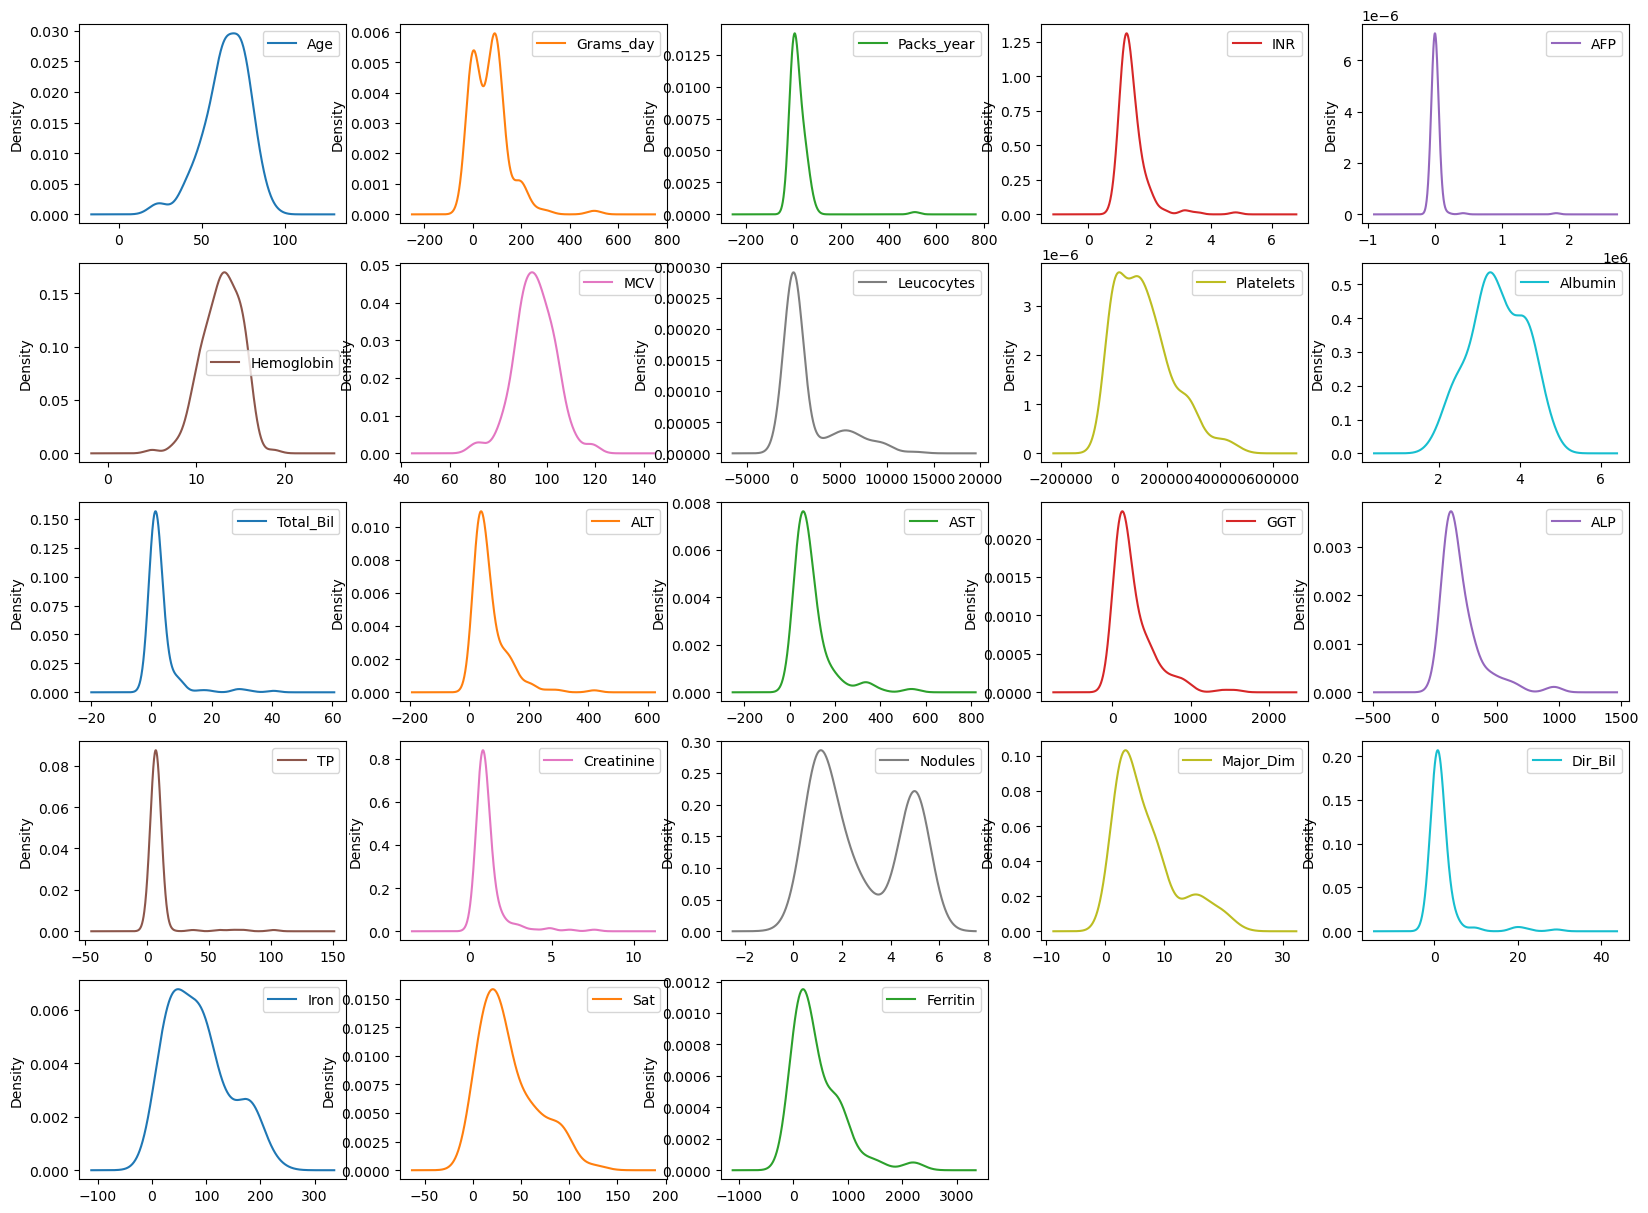

In [17]:
#only shows columns with numerical values
data_set.plot(kind='density', subplots=True, layout=(5, 5), figsize=(20, 15), sharex=False)
plt.show()

Now let's plot each column with **numerical** data type while also taking into account the **"Class"** that each case falls into by creating **violin plots** that represent each of them.

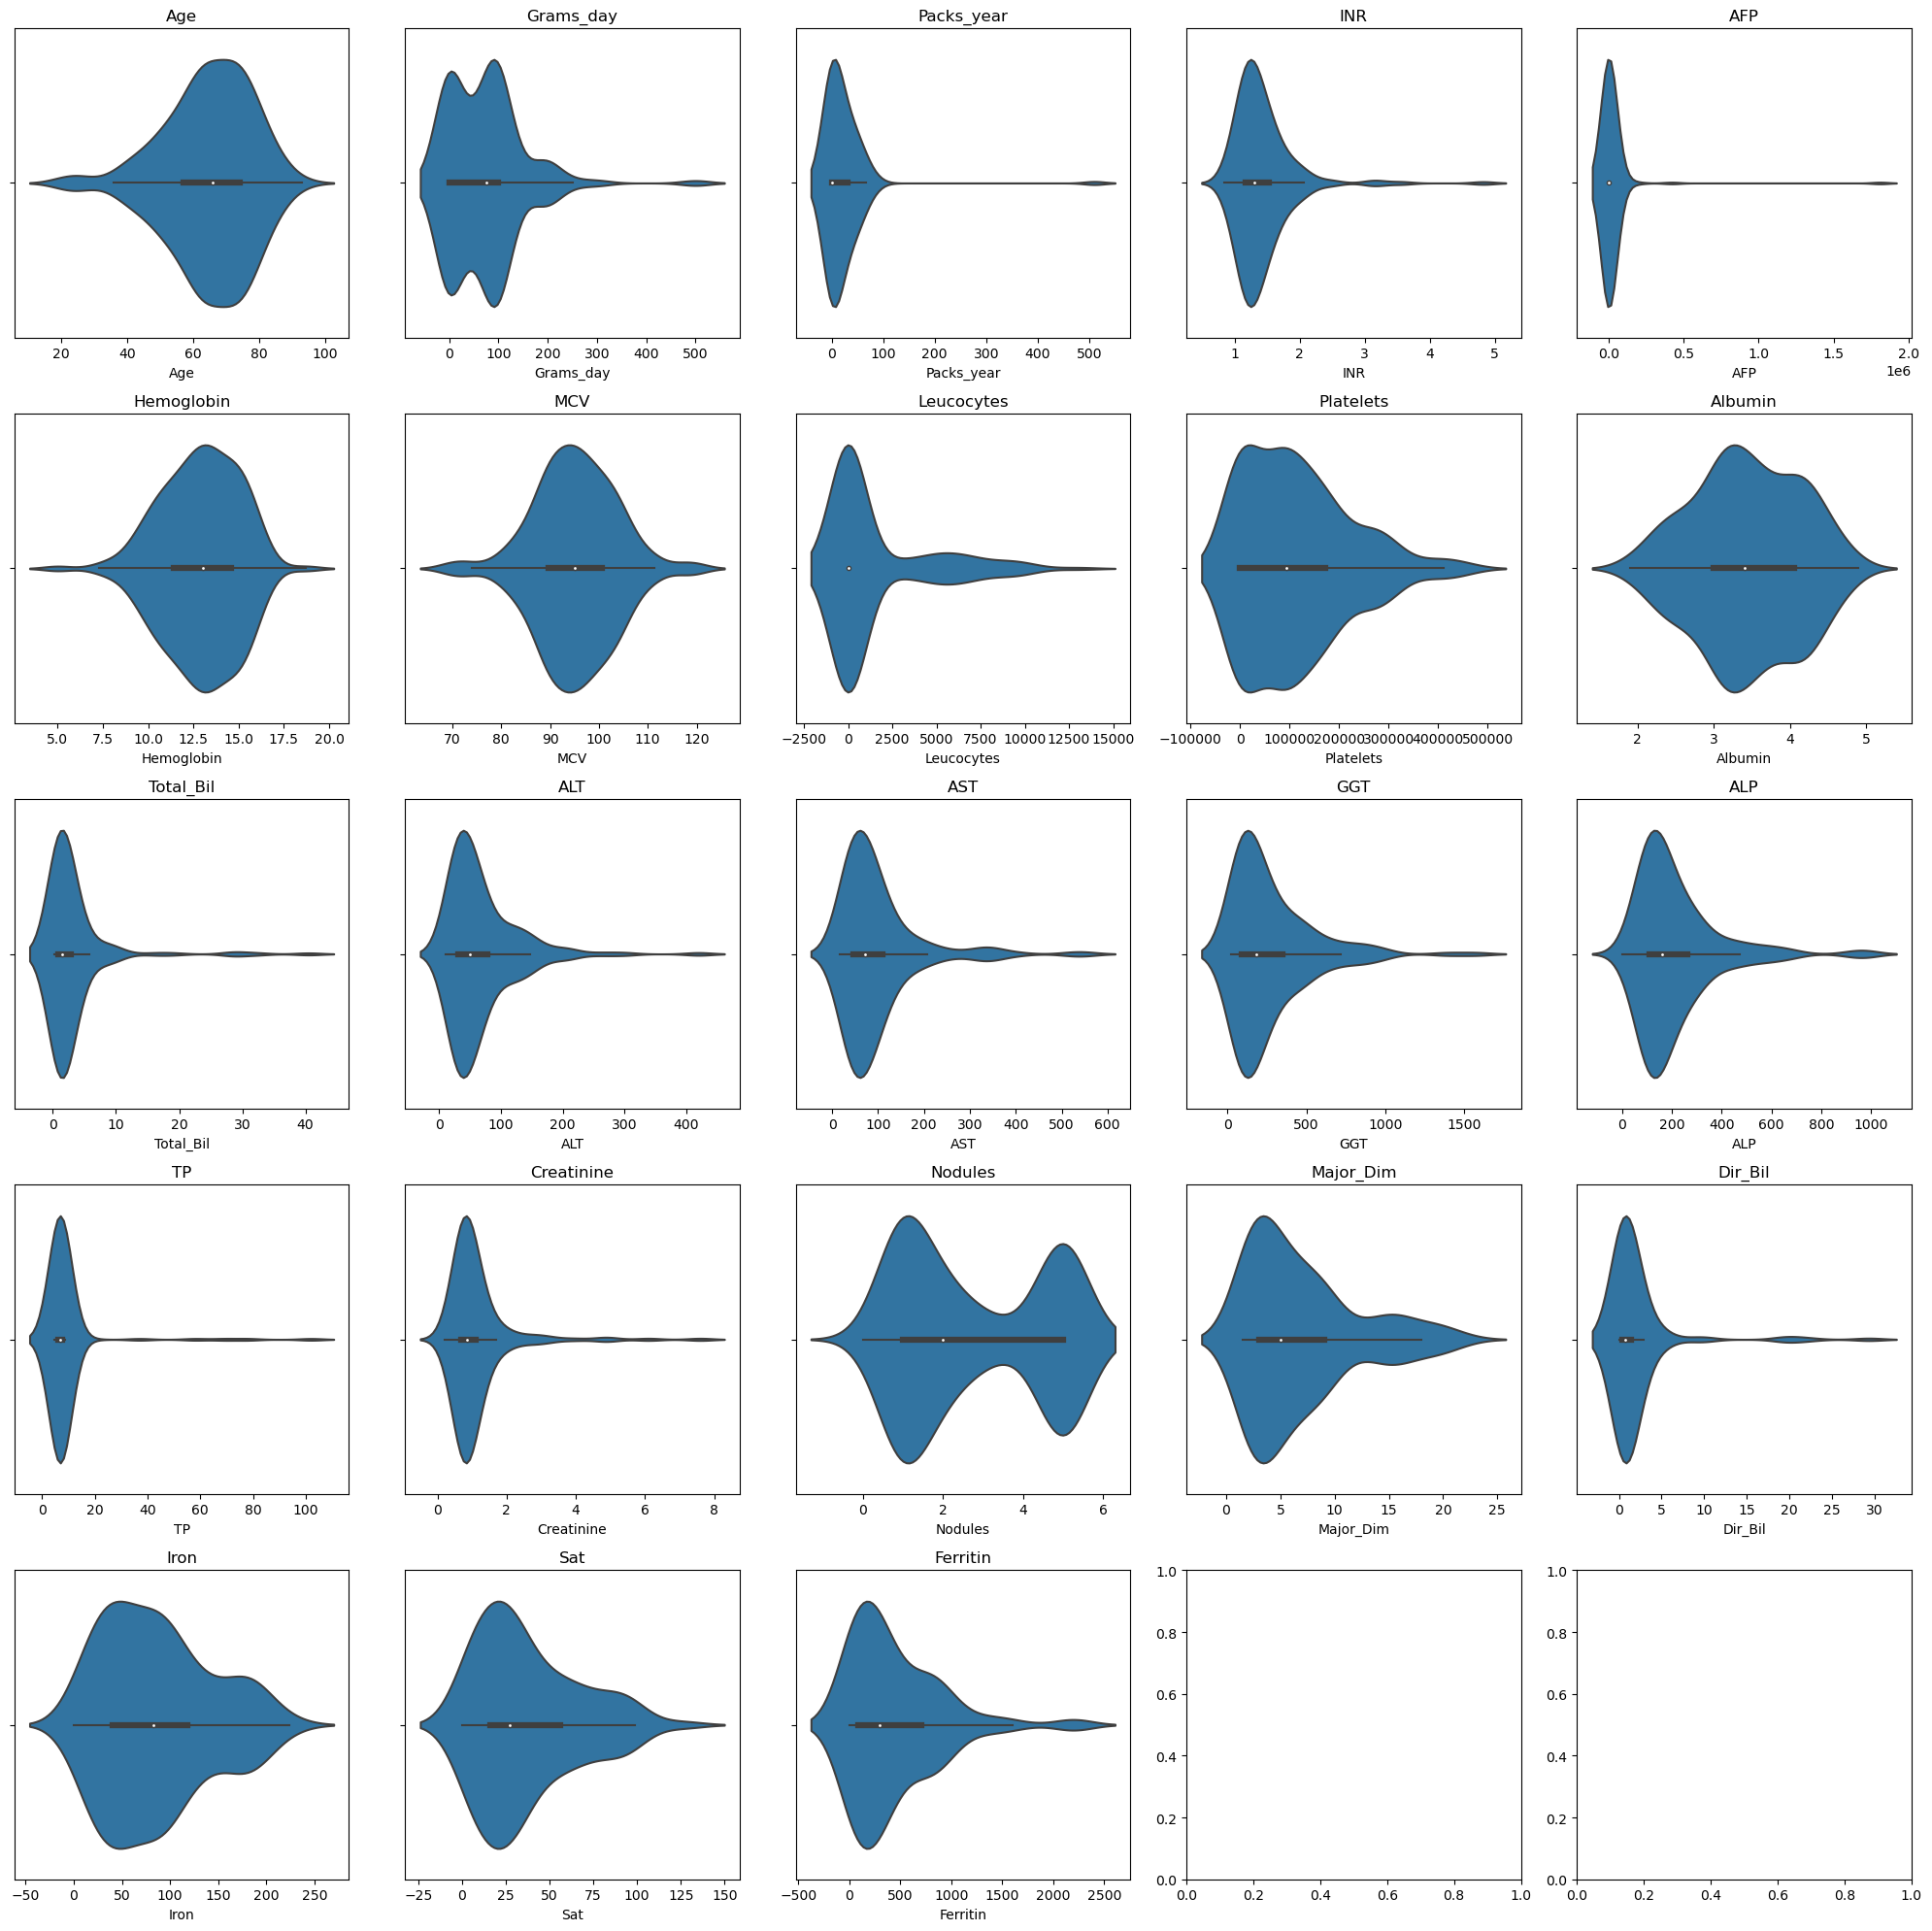

In [18]:
numerical_columns = data_set.select_dtypes(include=[int,float])

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Plot count plots with hue for object columns using Seaborn
for idx, column in enumerate(numerical_columns.columns):
    #sb.countplot(data=data_set, x=column, hue="Class", ax=axes.flatten()[idx])
    sb.violinplot(x = column, hue="Class", data = data_set,ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Now let's represent them in a **scatter** kind of plot.

c:\Users\arcan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arcan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arcan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arcan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

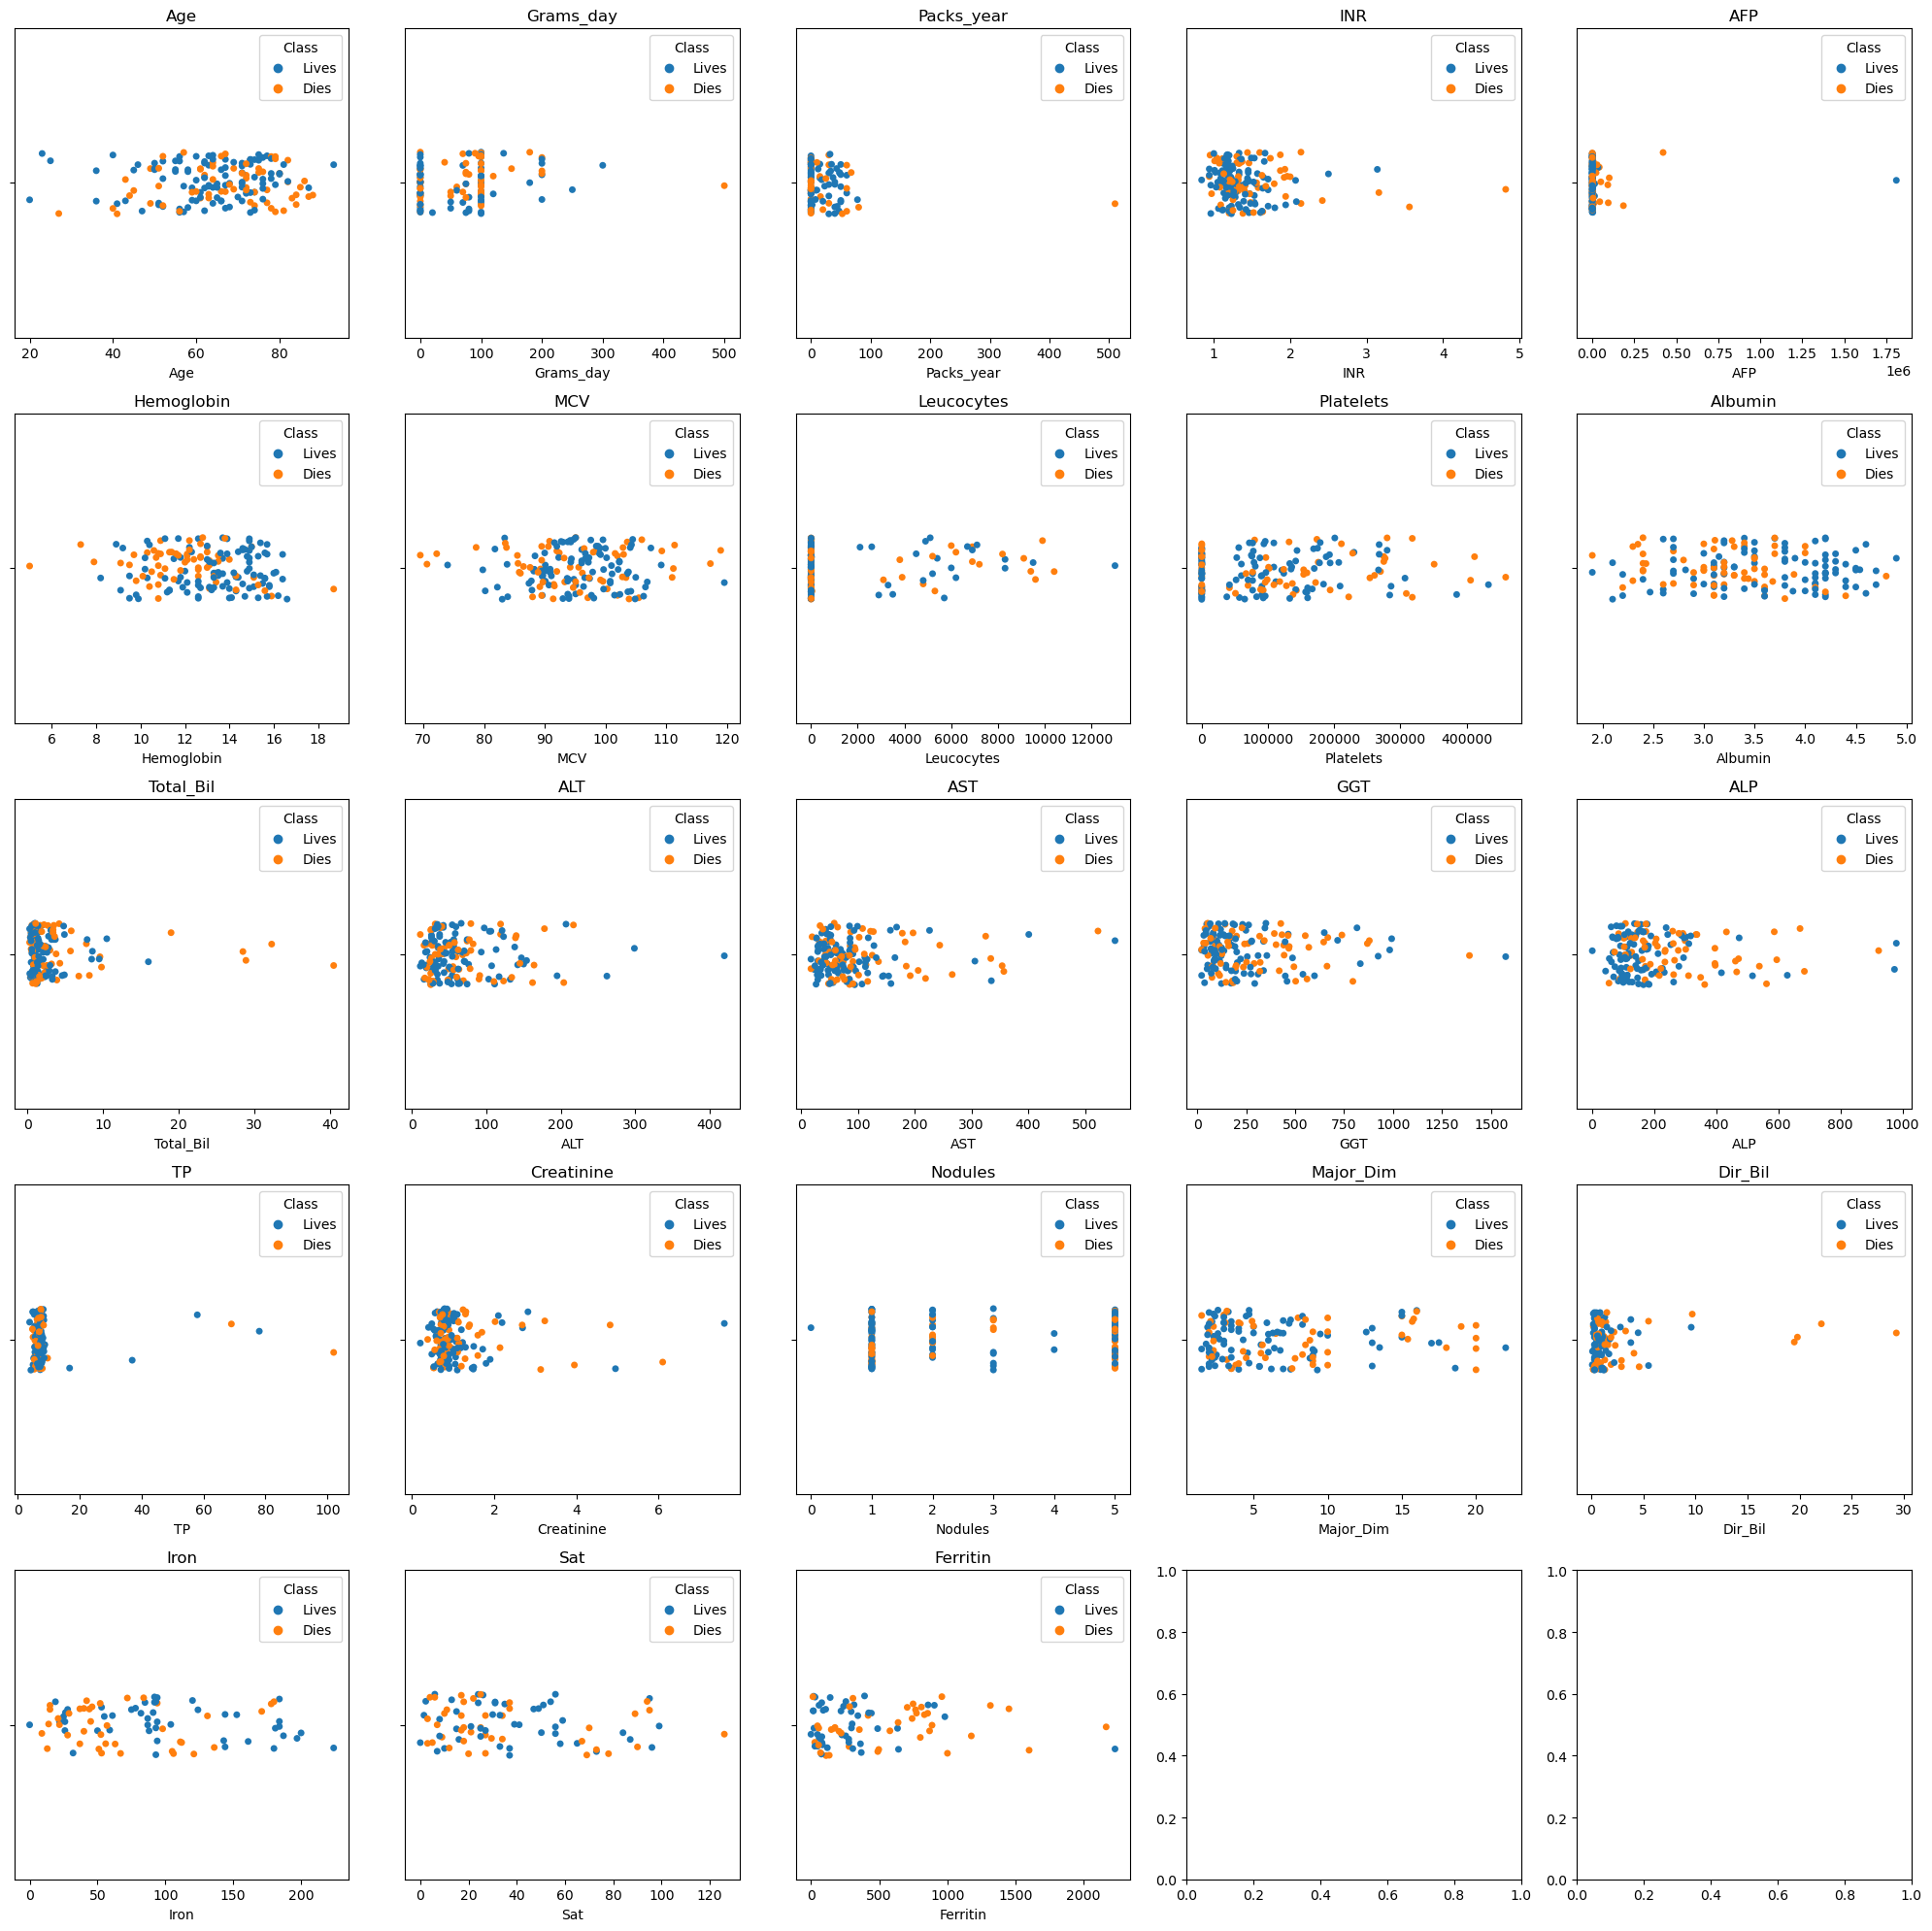

In [19]:
numerical_columns = data_set.select_dtypes(include=[int,float])

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Plot count plots with hue for object columns using Seaborn
for idx, column in enumerate(numerical_columns.columns):
    #sb.countplot(data=data_set, x=column, hue="Class", ax=axes.flatten()[idx])
    sb.stripplot(x = column, hue="Class", data = data_set,ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Let's analize each column with **object** data type by creating **pie** graphs that represent each of them.

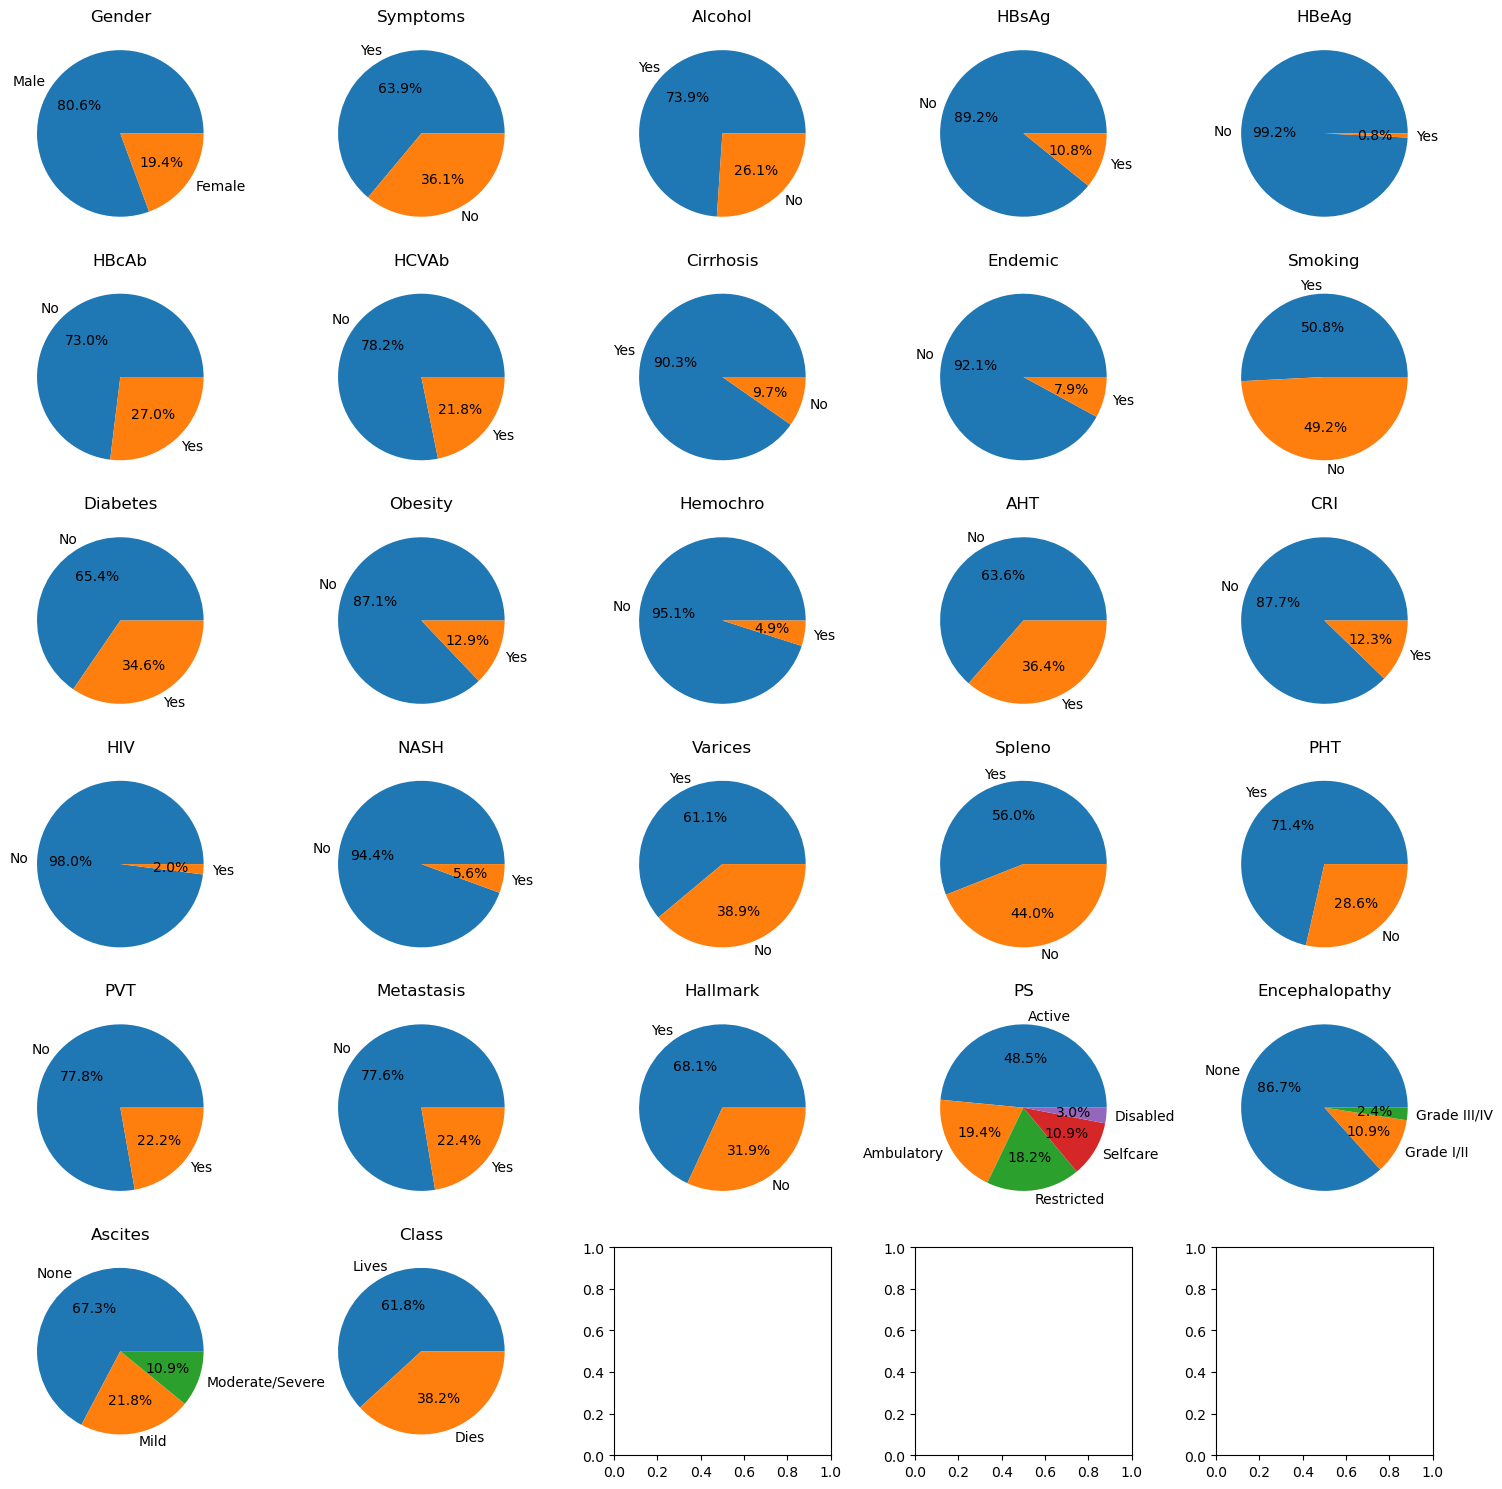

In [20]:
object_columns = data_set.select_dtypes(include=object)

# Create subplots
num_cols = len(object_columns.columns)
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

# Plot pie charts for object columns
for idx, column in enumerate(object_columns.columns):
    counts = object_columns[column].value_counts()
    axes.flatten()[idx].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Now let's plot each column with **object** data type while also taking into account the **"Class"** that each case falls into by creating **count plots** that represent each of them.

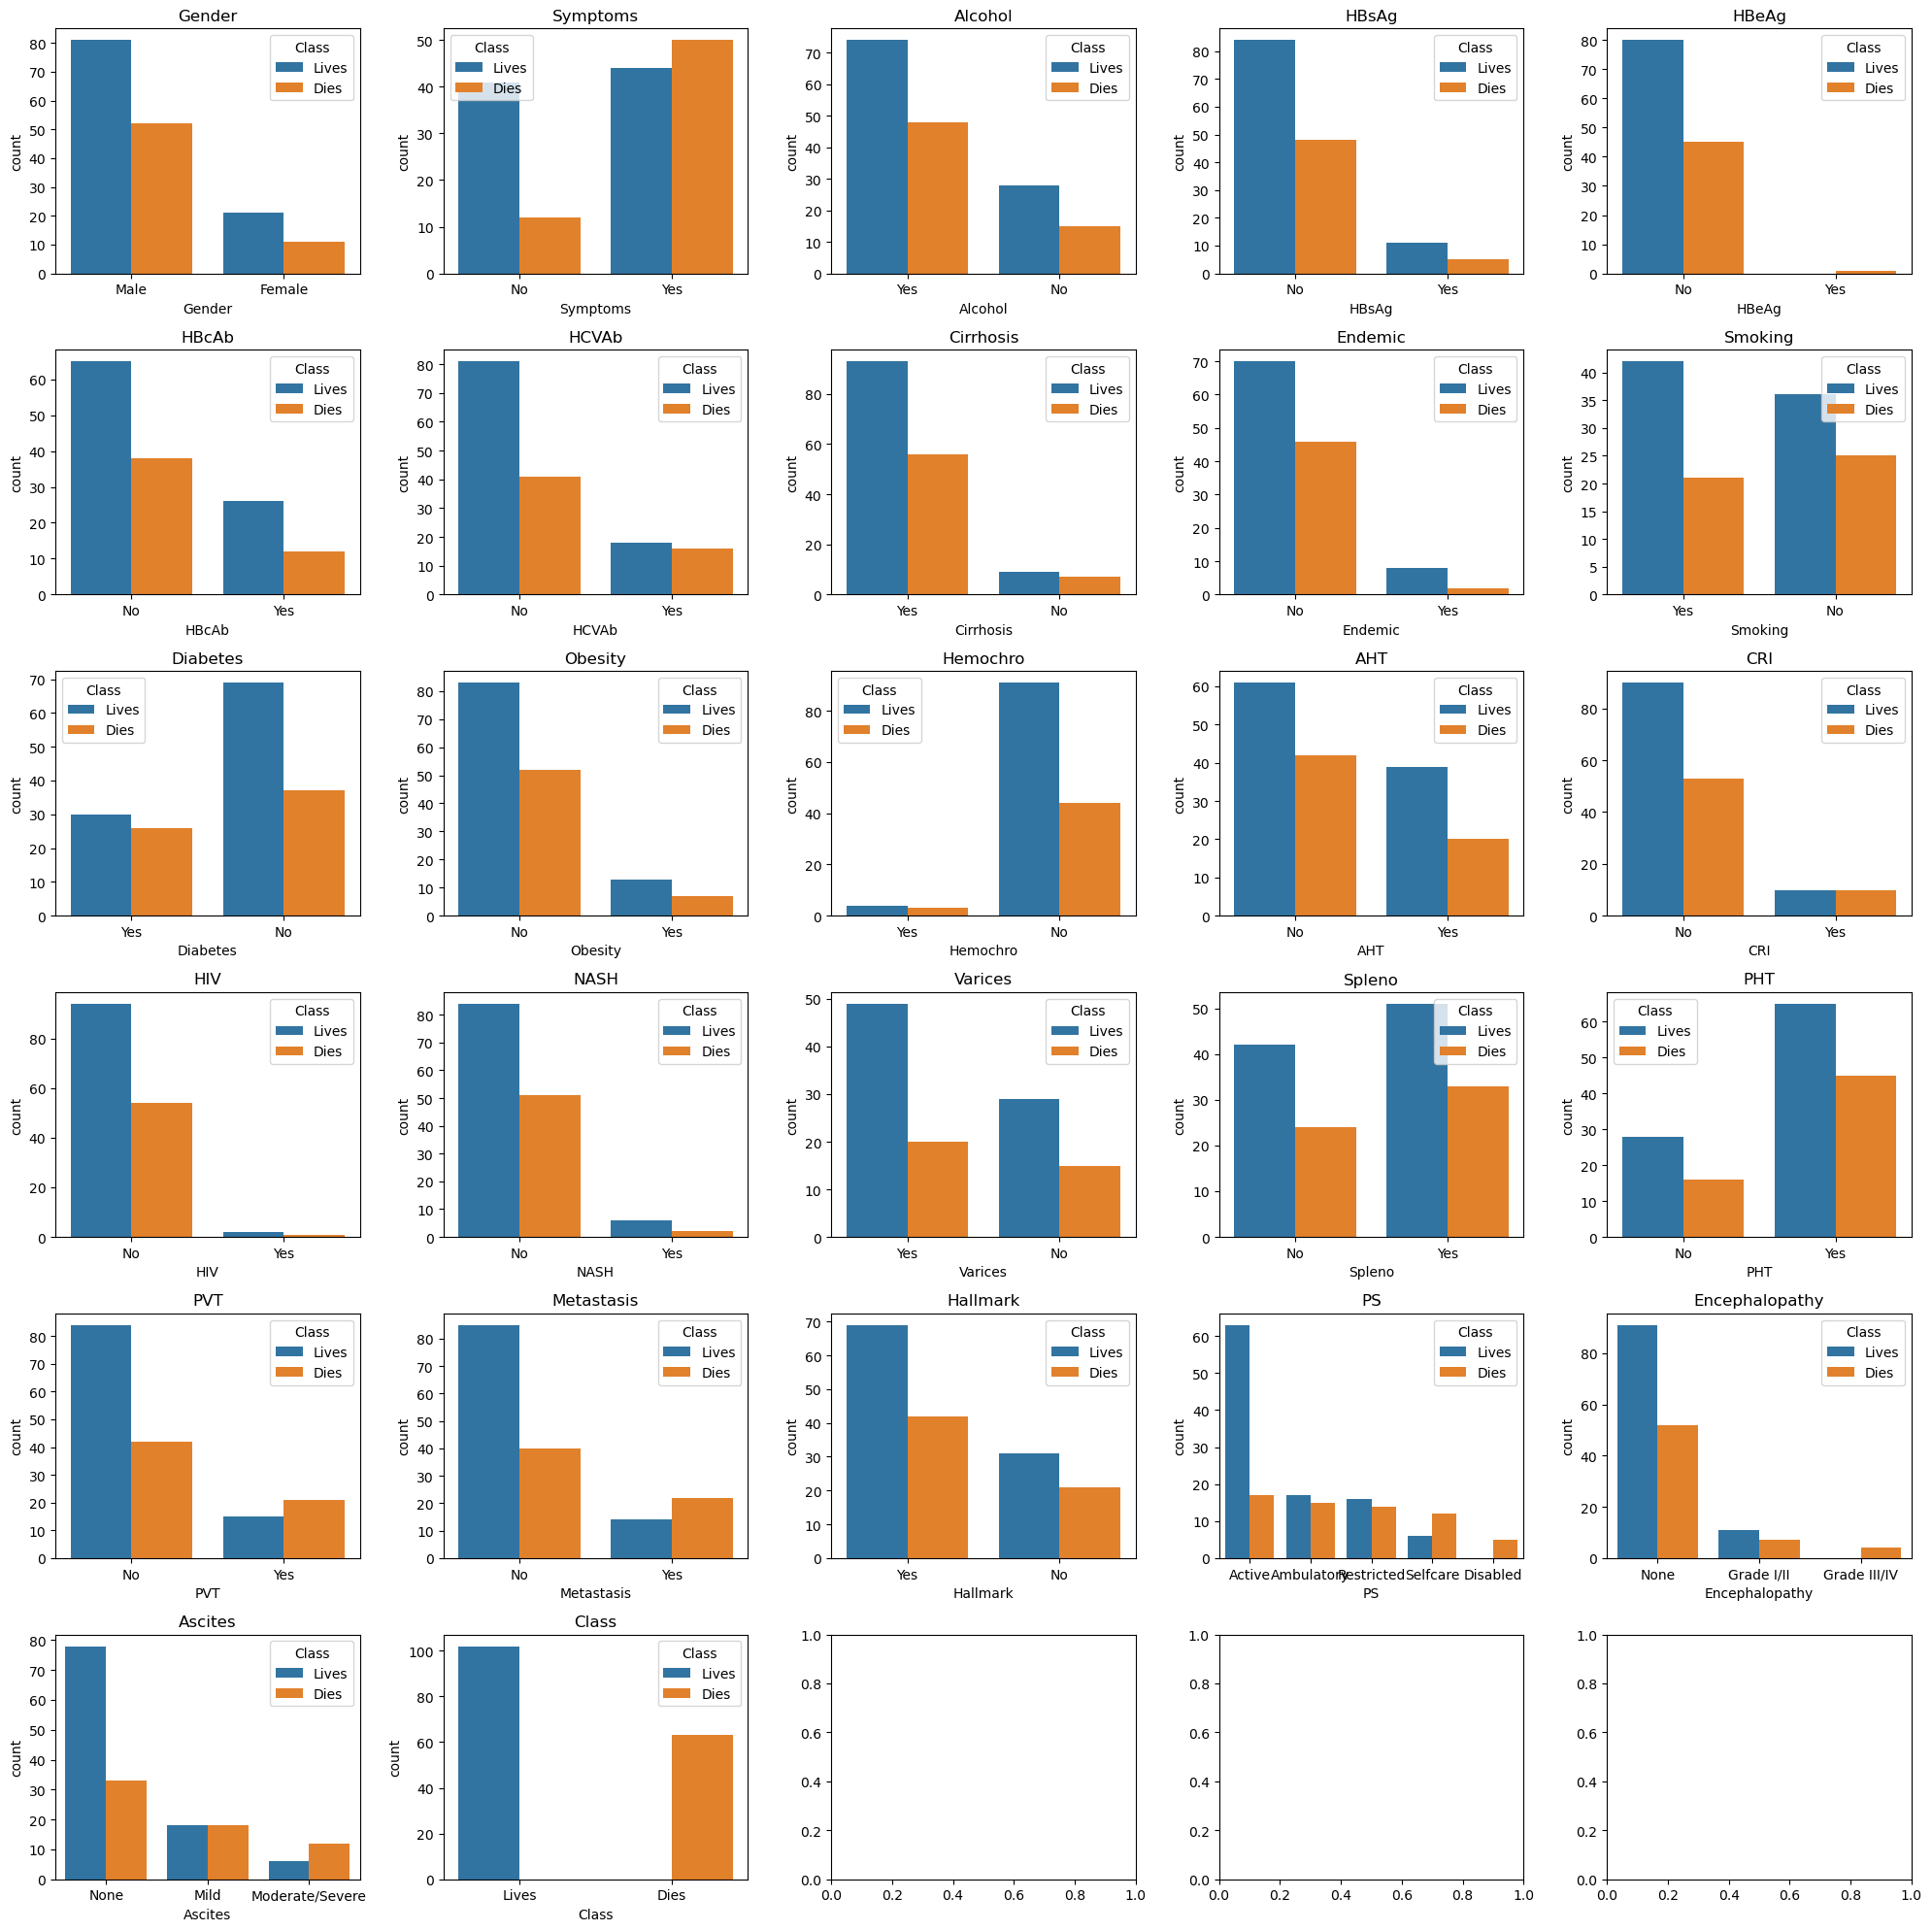

In [21]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))

# Plot count plots with hue for object columns using Seaborn
for idx, column in enumerate(object_columns.columns):
    sb.countplot(data=object_columns, x=column, hue="Class", ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Plotting function takes a long time to render due to too much data (165 rows, 50 columns) and the fact that there are so **many columns** to analize that the subplots end up being to small to fit on screen.
Not to mention that **most of the cases** have at least one column as "NaN" not being rendered into the graphs.
Therefore, some **columns need to be filtered or discarded** and we have to find a way to **turn every "NaN" value** into something that can be considered **average**.

In [22]:
# We have to temporarily drop the rows with 'NA' values because the Seaborn plotting function does not know what to do with them
sb.pairplot(data_set.dropna(), hue='Class',height=20, aspect=1)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026CC9172660> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Comparing 2 columns with sns.relplot() takes way less time.

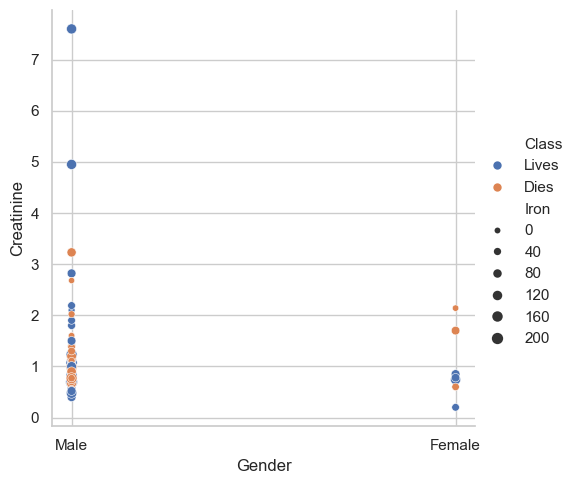

In [ ]:
# Include Seaborn for some graphics
sb.set(style = "whitegrid")
# scatter plot: joint distribution of two variables (hue and size are optional)
sb.relplot(x = "Gender", y = "Creatinine",hue="Class",size="Iron", data = data_set)

Class
Lives    102
Dies      63
Name: count, dtype: int64

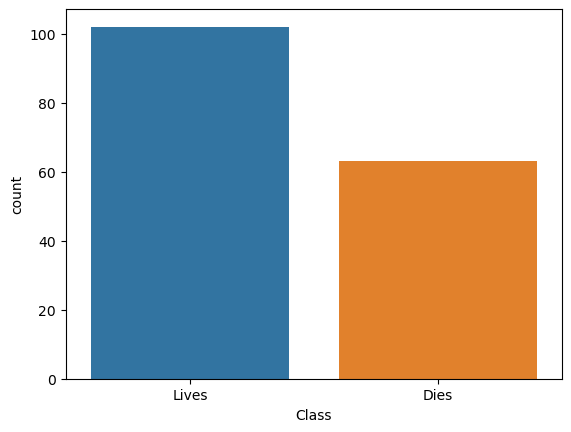

In [ ]:
sb.countplot(x="Class",data = data_set)
data_set["Class"].value_counts()

To get the heatmap of all the correlations between the numerical features:

<Axes: >

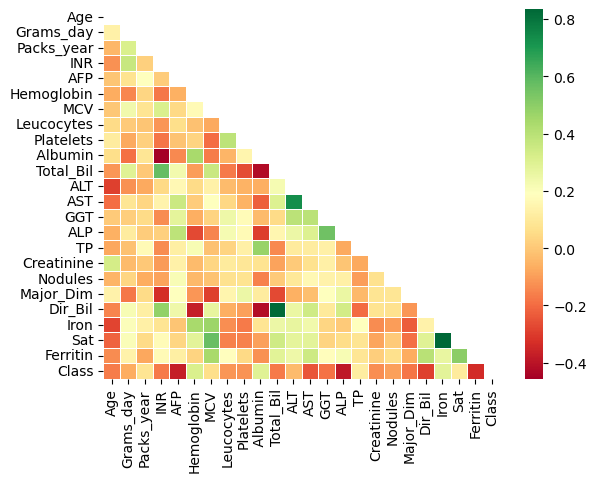

In [ ]:
class_numerical = data_set.copy()
class_numerical.loc[class_numerical["Class"] == "Lives",["Class"]] = 1
class_numerical.loc[class_numerical["Class"] == "Dies",["Class"]] = 0
class_numerical['Class'] = class_numerical['Class'].astype(int)
class_numerical["Class"].dtype

sb.heatmap(class_numerical.corr(method="spearman",numeric_only=True), mask=np.triu(class_numerical.corr(numeric_only=True)), cmap="RdYlGn", linewidth=.5)


But if we want to specially analize how they correlate to the "Class" feature:

In [ ]:
class_numerical.corr(method="spearman", numeric_only=True)["Class"].sort_values(ascending=False)

Class         1.000000
Hemoglobin    0.314035
 Albumin      0.295054
Iron          0.283248
TP            0.116123
Sat           0.106358
Packs_year    0.081220
MCV           0.060790
ALT          -0.034473
Grams_day    -0.071903
Nodules      -0.094939
Leucocytes   -0.116307
Platelets    -0.122256
Creatinine   -0.132597
Age          -0.164154
INR          -0.168709
Total_Bil    -0.168937
Major_Dim    -0.183091
GGT          -0.184803
AST          -0.248587
Dir_Bil      -0.292743
Ferritin     -0.337670
AFP          -0.370365
ALP          -0.388299
Name: Class, dtype: float64

<Axes: >

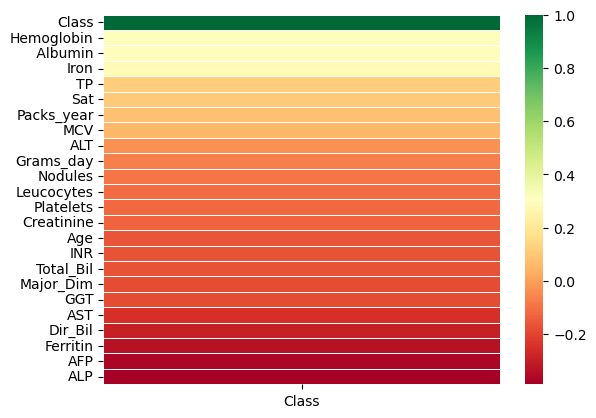

In [26]:
class_corr = class_numerical.corr(method="spearman", numeric_only=True)["Class"].sort_values(ascending=False)
class_corr_df = class_corr.to_frame()
sb.heatmap(class_corr_df, cmap="RdYlGn", linewidth=.5)

**Conclusions:** to what concern the numerical features, the greater the value of "Hemoglobin","Albumin","Iron" the higher probability of the patient surviving. The reverse happens to the features at the bottom.